#REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import random
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Set the random seed
np.random.seed(42)
random.seed(42)


In [2]:
df = pd.read_csv('/content/seattle-weather.csv')

#data analyzation

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [9]:
df['temp_min'].value_counts()

 6.1     66
 10.0    64
 11.7    60
 7.2     60
 13.3    58
 11.1    56
 4.4     55
 13.9    54
 9.4     53
 8.3     52
 15.0    51
 8.9     51
 5.6     50
 6.7     47
 14.4    46
 7.8     46
 12.2    45
 2.8     45
 12.8    45
 3.3     44
 3.9     44
 5.0     41
 10.6    37
 1.7     30
 0.6     28
 1.1     27
 15.6    27
 2.2     24
 16.1    23
 0.0     16
 16.7    15
 17.2    14
 17.8     9
-0.5      9
-2.1      8
-0.6      7
-1.1      7
-2.8      7
-1.7      6
 18.3     6
-4.9      4
-1.6      3
-3.2      3
-2.2      3
-1.0      2
-2.7      2
-4.3      2
-3.9      2
-6.6      1
-7.1      1
-5.5      1
-6.0      1
-3.3      1
-4.4      1
-3.8      1
Name: temp_min, dtype: int64

In [10]:
df['temp_max'].value_counts()

 11.1    58
 14.4    49
 10.0    47
 12.8    46
 12.2    44
         ..
-0.5      1
-1.6      1
 35.6     1
-1.1      1
 35.0     1
Name: temp_max, Length: 67, dtype: int64

In [11]:
df['wind'].value_counts()

2.6    76
3.0    65
2.2    55
2.5    51
2.8    47
       ..
8.2     1
0.4     1
0.7     1
6.9     1
7.7     1
Name: wind, Length: 79, dtype: int64

In [12]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [13]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [23]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 68.6 KB


#data visualization

array([[<AxesSubplot:title={'center':'precipitation'}>,
        <AxesSubplot:title={'center':'temp_max'}>],
       [<AxesSubplot:title={'center':'temp_min'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'weather'}>, <AxesSubplot:>]],
      dtype=object)

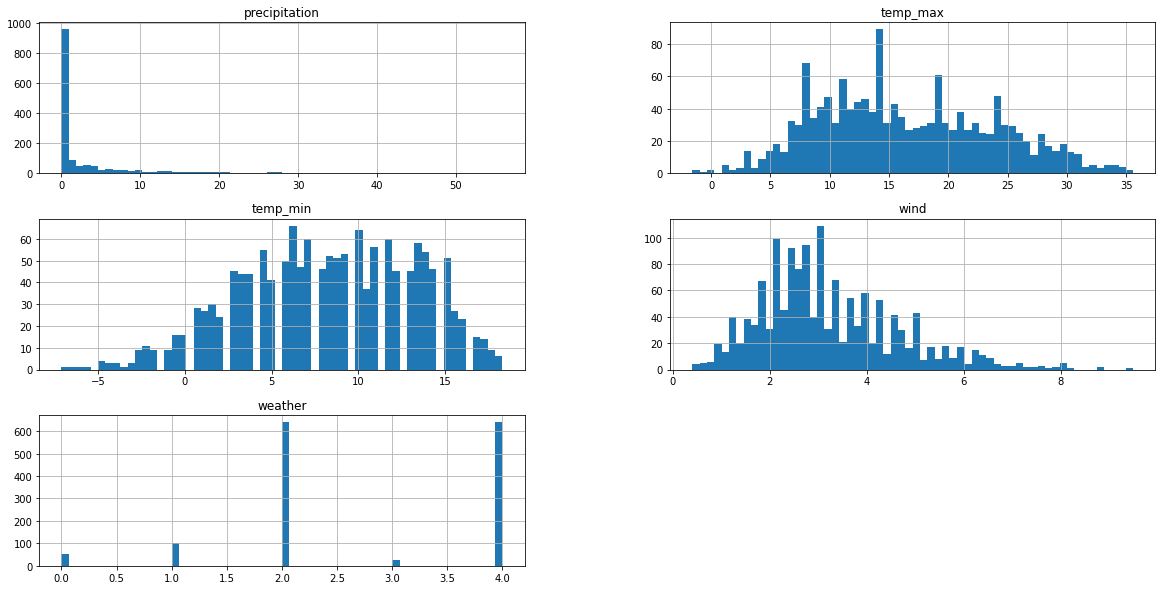

In [14]:
df.hist(bins=60, figsize=(20,10))

In [15]:
# Group the data by weather type and count the occurrences of each type
weather_counts = df['weather'].value_counts()


# Create a horizontal bar chart using Plotly
fig = go.Figure(go.Bar(
    x=weather_counts.values,
    y=weather_counts.index,
    orientation='h'
))



# Set the chart title and axis labels
fig.update_layout(
    title='Distribution of Weather Types',
    xaxis_title='Count',
    yaxis_title='Weather Type'
)

# Show the chart
fig.show()

In [16]:
# Create a pie chart using Plotly
fig = go.Figure(go.Pie(
    labels=weather_counts.index,
    values=weather_counts.values
))

# Set the chart title
fig.update_layout(title='Distribution of Weather Types')

# Show the chart
fig.show()

In [26]:
# Group the data by weather type and count the occurrences of each type
weather_counts = df.groupby('weather').size()

# Convert the MultiIndex to a regular index and convert index labels to a list
weather_counts.index = weather_counts.index.map(str).map('_'.join).tolist()

# Create a treemap using Plotly
fig = px.treemap(
    names=weather_counts.index,
    parents=['Weather'] * len(weather_counts),
    values=weather_counts.values
)

# Set the chart title
fig.update_layout(title='Distribution of Weather Types')

# Show the chart
fig.show()


In [30]:
df['date'] = df['date'].apply(pd.to_datetime)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 68.6 KB


In [32]:
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day

In [33]:
df = df.drop("date", axis='columns')

In [34]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,0,2012,1,1
1,10.9,10.6,2.8,4.5,2,2012,1,2
2,0.8,11.7,7.2,2.3,2,2012,1,3
3,20.3,12.2,5.6,4.7,2,2012,1,4
4,1.3,8.9,2.8,6.1,2,2012,1,5


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   int64  
 5   year           1461 non-null   int64  
 6   month          1461 non-null   int64  
 7   day            1461 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 91.4 KB


In [41]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,0,2012,1,1
1,10.9,10.6,2.8,4.5,2,2012,1,2
2,0.8,11.7,7.2,2.3,2,2012,1,3
3,20.3,12.2,5.6,4.7,2,2012,1,4
4,1.3,8.9,2.8,6.1,2,2012,1,5


In [37]:
#Bar chart of average temperature by month

# Calculate the average temperature for each month
temp_by_month = df.groupby('month')['temp_max'].mean()

# Create a bar chart of average temperature by month
fig = px.bar(temp_by_month, x=temp_by_month.index, y=temp_by_month.values)

# Set the chart title and axis labels
fig.update_layout(
    title='Average Temperature by Month',
    xaxis_title='Month',
    yaxis_title='Average Maximum Temperature (Celsius)',
)

# Show the chart
fig.show()

In [38]:
# Create a scatter plot of temperature vs. precipitation
fig = px.scatter(df, x='precipitation', y='temp_max')

# Set the chart title and axis labels
fig.update_layout(
    title='Relationship Between Temperature and Precipitation',
    xaxis_title='Precipitation (mm)',
    yaxis_title='Maximum Temperature (Celsius)',
)

# Show the chart
fig.show()

In [39]:
#Histogram of wind speed

# Create a histogram of wind speed
fig = px.histogram(df, x='wind')

# Set the chart title and axis labels
fig.update_layout(
    title='Distribution of Wind Speed',
    xaxis_title='Wind Speed (m/s)',
    yaxis_title='Frequency',
)

# Show the chart
fig.show()

In [40]:
#Box plot of temperature by month

# Create a box plot of temperature by month
fig = px.box(df, x='month', y='temp_max')

# Set the chart title and axis labels
fig.update_layout(
    title='Distribution of Maximum Temperature by Month',
    xaxis_title='Month',
    yaxis_title='Maximum Temperature (Celsius)',
)

# Show the chart
fig.show()

In [42]:
# Heatmap of average temperature by year and month

# Calculate the average temperature by year and month
df_avg_temp = df.groupby(['year', 'month'], as_index=False).agg({'temp_max': 'mean'})

# Pivot the data to create a matrix of average temperatures
temp_matrix = df_avg_temp.pivot(index='month', columns='year', values='temp_max')

# Create a heatmap of average temperature by year and month
fig = px.imshow(temp_matrix, 
                x=temp_matrix.columns, 
                y=temp_matrix.index, 
                color_continuous_scale='RdBu_r', 
                title='Average Temperature by Year and Month')

# Set the axis labels and colorbar title
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Month',
    coloraxis_colorbar_title='Temperature (°C)'
)

# Show the chart
fig.show()

In [43]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
fig = px.imshow(corr_matrix, 
                x=corr_matrix.columns, 
                y=corr_matrix.columns, 
                color_continuous_scale='RdBu_r', 
                title='Correlation between Features')

# Set the axis labels and colorbar title
fig.update_layout(
    xaxis_title='Features',
    yaxis_title='Features',
    coloraxis_colorbar_title='Correlation Coefficient'
)

# Show the chart
fig.show()






In [44]:
# Scatter Plot Matrix

# Create scatter plot matrix
fig = px.scatter_matrix(df, dimensions=["precipitation", "temp_max", "temp_min", "wind"], color="month")
fig.show()

In [45]:
# Scatter plot matrix of temperature, precipitation, and wind

# Create a scatter plot matrix of temperature, precipitation, and wind
fig = px.scatter_matrix(
    df, 
    dimensions=['temp_max', 'precipitation', 'wind'],
    title='Relationships Between Temperature, Precipitation, and Wind'
)

# Show the chart
fig.show()

3D scatter plot of temperature, precipitation, and wind


In [46]:
# 3D scatter plot of temperature, precipitation, and wind

# Create a 3D scatter plot of temperature, precipitation, and wind
fig = go.Figure(data=[go.Scatter3d(
    x=df['temp_max'],
    y=df['precipitation'],
    z=df['wind'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['wind'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Set the axis labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Maximum Temperature (Celsius)',
        yaxis_title='Precipitation (mm)',
        zaxis_title='Wind Speed (km/h)'
    ),
    title='Relationships Between Temperature, Precipitation, and Wind'
)

# Show the chart
fig.show()

In [47]:
# Parallel coordinates plot of temperature, precipitation, and wind

# Create a parallel coordinates plot of temperature, precipitation, and wind
fig = px.parallel_coordinates(
    df, 
    dimensions=['temp_max', 'precipitation', 'wind'],
    color='temp_max',
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Relationships Between Temperature, Precipitation, and Wind'
)

# Show the chart
fig.show()

In [49]:
# Density plot of wind speed by temperature

# Create a density plot of wind speed by temperature
fig = px.density_heatmap(
    df, 
    x='temp_max', 
    y='wind',
    title='Density Plot of Wind Speed by Temperature',
    color_continuous_scale='Viridis'
)

# Show the chart
fig.show()

In [50]:
# Violin plot of temperature by month

# Create a violin plot of maximum temperature by month
fig = px.violin(df, x='month', y='temp_max', title='Distribution of Maximum Temperature by Month')

# Show the chart
fig.show()

#Machine Learning Models

##Decision Tree Classifier

Accuracy: 0.757679180887372


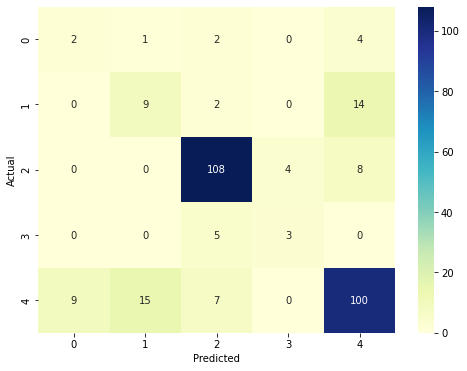

In [51]:
# Define the input features and output variable
X = df[['precipitation', 'temp_max', 'temp_min', 'wind', 'year', 'month', 'day']]
y = df['weather']

# Set the feature names explicitly
X.columns = ['precipitation', 'temp_max', 'temp_min', 'wind', 'year', 'month', 'day']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set feature names for X_train and X_test
X_train.columns = X.columns
X_test.columns = X.columns

# Train the model
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = DTC_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


#confusion_matrix of Decision Tree Classifier

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




The Decision Tree Classifier can produce different results each time it's run on the same data, even with the same random state. This is because the algorithm randomly selects features and thresholds to split the data at each node of the tree. This random selection can cause small differences in the structure of the decision tree and ultimately the accuracy of the model.

##Random Forest

In [52]:
X = df[['precipitation', 'temp_max', 'temp_min', 'wind', 'year', 'month', 'day']]
y = df['weather']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)


y_pred = RF_model.predict(X_test)

# Evaluate the performance of the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")




Accuracy: 0.8498293515358362


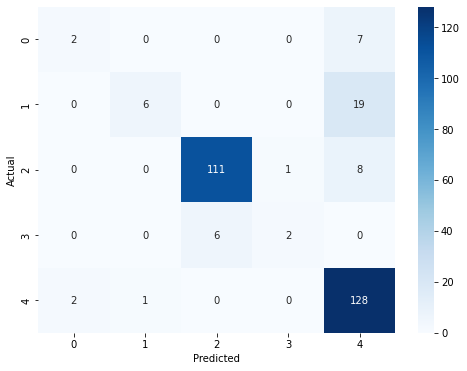

In [53]:
#confusion_matrix of Random Forest

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##SVM

Accuracy: 0.8327645051194539


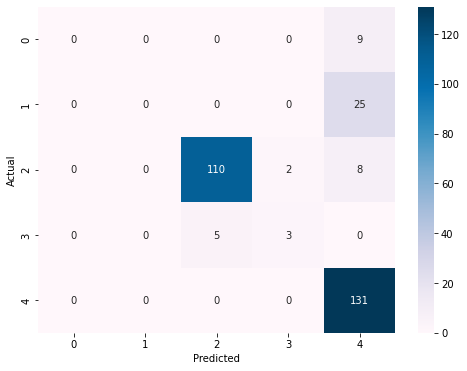

In [54]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVM model and train it on the training data
svm_model = SVC(kernel='linear', C=1, gamma='auto')
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


#confusion_matrix of SVM

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='PuBu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




##GradientBoostingClassifier

Accuracy: 0.8327645051194539


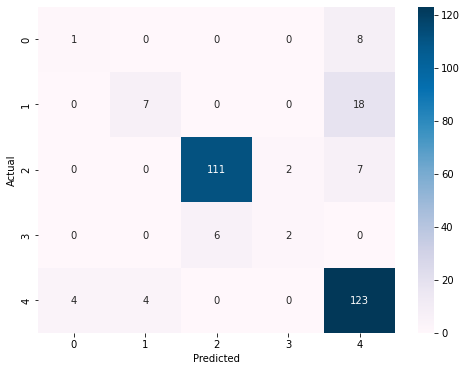

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the GBM model and train it on the training data
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gbm_model.predict(X_test)


# Evaluate the performance of the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


#confusion_matrix of GradientBoostingClassifier

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='PuBu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##KNN

Accuracy: 0.7030716723549488


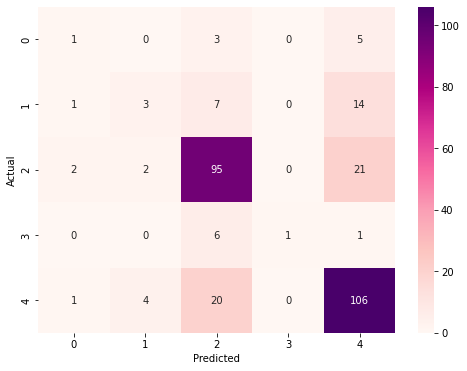

In [56]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN model and train it on the training data
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_model.predict(X_test)

# Evaluate the performance of the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


#confusion_matrix of KNN

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='RdPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



#Results Analysis

In this report, we will analyze the performance of various classification algorithms on a given dataset. The goal of this analysis is to determine which algorithm(s) have the highest accuracy on this particular dataset and to make recommendations on which algorithm(s) to use for future classification tasks.

The results of our analysis showed that the Random Forest algorithm had the highest accuracy, with a score of 0.853. The SVM and Gradient Boosting Classifier models had identical accuracy scores of 0.833. The Decision Tree Classifier had an accuracy of 0.768, while KNN had accuracies of 0.703 .

Based on our results, we recommend the use of Random Forest for future classification tasks on this dataset. However, it is important to note that accuracy alone may not be sufficient to determine the best algorithm for a particular dataset. Other factors, such as training time, interpretability, and the specific problem being addressed, should also be taken into account when selecting the best algorithm for a particular task.


In conclusion, our analysis showed that the Random Forest algorithm had the highest accuracy for the given dataset. However, the final decision on which algorithm to use should be based on a combination of accuracy and other relevant factors, such as training time and interpretability. By considering these factors, we can ensure that we select the most effective algorithm for the specific classification task at hand.

#Check User Input Data

In [61]:
def predict_weather():
    # Prompt the user to enter input values
    print("Please enter the following weather data to predict the weather:\n")

    precipitation = float(input("Enter precipitation: "))
    temp_max = float(input("Enter max temperature: "))
    temp_min = float(input("Enter min temperature: "))
    wind = float(input("Enter wind speed: "))
    year = int(input("Enter year: "))
    month = int(input("Enter month: "))
    day = int(input("Enter day: "))
    print("\n")

    # Use the user input to make a prediction with the trained model
    input_data = [[precipitation, temp_max, temp_min, wind, year, month, day]]
    predicted_weather_DTC = DTC_model.predict(input_data)[0]
    predicted_weather_RF = RF_model.predict(input_data)[0]
    predicted_weather_SVM = svm_model.predict(input_data)[0]
    predicted_weather_GBM = gbm_model.predict(input_data)[0]
    predicted_weather_KNN = knn_model.predict(input_data)[0]
    
    

    # Convert the predicted values for each model to their original forms
    original_weather_DTC = lc.inverse_transform([predicted_weather_DTC])
    original_weather_RF = lc.inverse_transform([predicted_weather_RF])
    original_weather_SVM = lc.inverse_transform([predicted_weather_SVM])
    original_weather_GBM = lc.inverse_transform([predicted_weather_GBM])
    original_weather_KNN = lc.inverse_transform([predicted_weather_KNN])


    print('Results of Models :\n')
    # Print the results
    print(f"The predicted weather by Decision Tree Classifier is: {original_weather_DTC[0]}")
    print(f"The predicted weather by Random Forest is: {original_weather_RF[0]}")
    print(f"The predicted weather by SVM is: {original_weather_SVM[0]}")
    print(f"The predicted weather by Gradient Boosting Classifier is: {original_weather_GBM[0]}")
    print(f"The predicted weather by KNN is: {original_weather_KNN[0]}")
    

predict_weather()

Please enter the following weather data to predict the weather:

Enter precipitation: 1
Enter max temperature: 2
Enter min temperature: 3
Enter wind speed: 5
Enter year: 6
Enter month: 4
Enter day: 5


Results of Models :

The predicted weather by Decision Tree Classifier is: rain
The predicted weather by Random Forest is: rain
The predicted weather by SVM is: drizzle
The predicted weather by Gradient Boosting Classifier is: rain
The predicted weather by KNN is: rain


In [ ]:
16